## Visualize

### 1. function to get_data_from_db

In [1]:
import mysql.connector
import os
from dotenv import load_dotenv
from mysql.connector import Error

import pandas as pd

In [2]:
def get_data_from_db(table_name, columns = '*'):
    
    # dot env
    load_dotenv()
    aws_db_ufo_pw = os.getenv('aws_db_ufo_pw')
    aws_host_ufo = os.getenv('aws_host_ufo')

    remote = mysql.connector.connect(
        host = aws_host_ufo,
        user = 'EDA',
        port = 3306,  # default 는 3306
        password = aws_db_ufo_pw,
        database = 'Frisbee'

        )
        
    

    cursor = remote.cursor(dictionary = True)
    
    
    query = f"""
        SELECT {columns} FROM {table_name}"""
    
    cursor.execute(query)
    
    results = cursor.fetchall()
    
    
    column_name = [des[0] for des in cursor.description]
    
    cursor.close()
    
    df = pd.DataFrame.from_records(results, index = column_name[0])
    
    
    return df
    

In [3]:
if __name__ == '__main__':
    df = get_data_from_db('metheo')
    

In [4]:
df

,date,time,address,state,latitude,longitude,elevation,magnitude,white,red,blue,green,purple,orange,yellow
id,,,,,,,,,,,,,,,
1,1995-06-08,0 days 02:00:00,"Trafalgar, IN",IN,39,-86,267,-13,0,0,0,1,0,0,0
2,1995-06-20,0 days 17:00:00,"Munhall, PA",PA,40,-79,329,-13,0,1,0,0,0,1,0
3,1995-07-04,0 days 21:30:00,"Myrtle, MS",MS,34,-89,108,-19,0,1,0,0,0,1,1
4,1995-08-01,0 days 16:00:00,"Pottstown, PA",PA,40,-75,46,-16,0,1,0,0,0,0,0
5,1995-12-15,0 days 06:50:00,"Eagan, MN",MN,44,-93,257,-15,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7490,2014-12-31,0 days 02:08:00,"Depoe Bay, OR",OR,44,-124,12,-6,1,0,0,0,0,0,0
7491,2014-12-31,0 days 22:20:00,", OH",OH,39,-83,309,-11,0,0,0,0,0,0,1
7492,2014-12-31,0 days 22:40:00,", NY",NY,40,-73,28,-14,0,0,0,0,0,1,0


### Metheo data visualize

In [5]:
df['-magnitude'] = df['magnitude']*-1

In [6]:
from bokeh.models import ColumnDataSource
from bokeh.palettes import Bright6
from bokeh.plotting import figure, show
import plotly.express as px

In [7]:
# address 열에서 state 데이터 추출이 어려운 데이터 확인

state_col= []
for add in df['address']:
    add_splitted = add.split(', ')[-1]
    
    if len(add_splitted) != 2:
        print(add,'    ' ,add_splitted)

Harrison charter Township      Harrison charter Township
-      -
Kailua-Kona      Kailua-Kona
Jasper      Jasper
-      -
-      -
-      -
-      -
-      -
-      -
-      -
Ephrata      Ephrata
-      -
Little Egg Harbor Townshi      Little Egg Harbor Townshi
-      -
New Wilmington      New Wilmington
Templeton      Templeton
Woodbury Heights      Woodbury Heights
Alamosa      Alamosa
-      -
-      -
Berlin Charter Township,      Berlin Charter Township,
Trezevant      Trezevant
Duck River      Duck River
Mequon      Mequon
Milwaukee      Milwaukee
Chalmette      Chalmette
Appleton      Appleton
North Ridgeville      North Ridgeville
-      -
Shrewsbury      Shrewsbury
Dunbar      Dunbar
Silver Lake State Park, M      M
-      -
-      -
Charter Township of Clint      Charter Township of Clint
Oakland Charter Township,      Oakland Charter Township,
-      -
Meridian Charter Township      Meridian Charter Township
Douglassville      Douglassville
Lincoln      Lincoln
-      -
- 

In [8]:
df_cleaned = df[df['state'].str.len() == 2]
df_cleaned

,date,time,address,state,latitude,longitude,elevation,magnitude,white,red,blue,green,purple,orange,yellow,-magnitude
id,,,,,,,,,,,,,,,,
1,1995-06-08,0 days 02:00:00,"Trafalgar, IN",IN,39,-86,267,-13,0,0,0,1,0,0,0,13
2,1995-06-20,0 days 17:00:00,"Munhall, PA",PA,40,-79,329,-13,0,1,0,0,0,1,0,13
3,1995-07-04,0 days 21:30:00,"Myrtle, MS",MS,34,-89,108,-19,0,1,0,0,0,1,1,19
4,1995-08-01,0 days 16:00:00,"Pottstown, PA",PA,40,-75,46,-16,0,1,0,0,0,0,0,16
5,1995-12-15,0 days 06:50:00,"Eagan, MN",MN,44,-93,257,-15,1,0,0,0,0,0,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7490,2014-12-31,0 days 02:08:00,"Depoe Bay, OR",OR,44,-124,12,-6,1,0,0,0,0,0,0,6
7491,2014-12-31,0 days 22:20:00,", OH",OH,39,-83,309,-11,0,0,0,0,0,0,1,11
7492,2014-12-31,0 days 22:40:00,", NY",NY,40,-73,28,-14,0,0,0,0,0,1,0,14


In [9]:
df_state = df_cleaned.groupby(by = 'state').count().sort_values(by = 'date', ascending = False)
top_10_state_list = df_state.head(10).index

In [10]:
fig = px.scatter_map(
                df_cleaned,
                lat="latitude",
                lon="longitude",
                color='state',
                size='-magnitude',
                color_continuous_scale=px.colors.cyclical.IceFire,
                size_max=20,
                zoom=2.5,
                width=1200,  # <-- 그래프 전체 가로 크기
                height=1200
                )
fig.show()

### Top 10 state metheo frequency

In [11]:
top_10_state_list = df_state.head(10).index

In [12]:
df_cleaned_top10 = df_cleaned[df_cleaned['state'].isin(top_10_state_list)]

In [13]:
df_cleaned_top10

,date,time,address,state,latitude,longitude,elevation,magnitude,white,red,blue,green,purple,orange,yellow,-magnitude
id,,,,,,,,,,,,,,,,
2,1995-06-20,0 days 17:00:00,"Munhall, PA",PA,40,-79,329,-13,0,1,0,0,0,1,0,13
4,1995-08-01,0 days 16:00:00,"Pottstown, PA",PA,40,-75,46,-16,0,1,0,0,0,0,0,16
6,1996-03-15,0 days 01:30:00,"Oceanside, CA",CA,33,-117,56,-26,0,0,0,1,0,0,1,26
7,1996-06-04,0 days 01:30:00,"Temple, TX",TX,31,-97,195,-14,0,0,0,0,0,1,1,14
9,1996-11-16,0 days 21:30:00,"Belchertown, MA",MA,42,-72,116,-27,0,0,0,0,0,0,1,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7488,2014-12-31,0 days 20:00:00,"Kings Mountain, NC",NC,35,-81,298,-24,1,1,0,0,0,1,1,24
7489,2014-12-31,0 days 20:00:00,"Winston-Salem, NC",NC,35,-80,264,0,0,0,1,0,0,0,0,0
7491,2014-12-31,0 days 22:20:00,", OH",OH,39,-83,309,-11,0,0,0,0,0,0,1,11


In [14]:
df_cleaned_gb= df_cleaned_top10.groupby(by = ['state', 'latitude', 'longitude']).mean(numeric_only=True)
df_cleaned_gb_indexes = df_cleaned_gb.index



In [15]:
index_dict = []
for idx, mag in zip(df_cleaned_gb_indexes, df_cleaned_gb['-magnitude']):
    index_dict.append({'state':idx[0], 'lat': idx[1], 'long' : idx[2], 'mag':mag })

In [16]:
fig = px.scatter_map(
                index_dict,
                lat="lat",
                lon="long",
                color='state',
                size='mag',
                color_continuous_scale=px.colors.cyclical.IceFire,
                size_max=50,
                zoom=2.5,
                width=1200,  # <-- 그래프 전체 가로 크기
                height=1200
                )
fig.show()

### Bottom 10 state metheo frequency

In [17]:
bottom_10_state_list = df_state.tail(10).index

In [20]:
df_cleaned_bottom10 = df_cleaned[df_cleaned['state'].isin(bottom_10_state_list)]

In [21]:
df_cleaned_bottom10

,date,time,address,state,latitude,longitude,elevation,magnitude,white,red,blue,green,purple,orange,yellow,-magnitude
id,,,,,,,,,,,,,,,,
10,1996-12-09,0 days 20:46:00,"Keystone, SD",SD,43,-103,1653,-4,0,0,0,1,0,0,0,4
69,2005-10-23,0 days 18:25:00,"Casper, WY",WY,42,-106,1592,0,0,0,0,0,0,1,0,0
85,2007-07-18,0 days 02:30:00,"Hill City, ID",ID,43,-115,1552,-9,0,0,0,0,0,0,1,9
112,2009-12-18,0 days 00:07:00,"Malta, ID",ID,42,-112,1472,-18,0,1,0,0,0,0,0,18
155,2013-02-22,0 days 21:00:00,"Fairbanks, AK",AK,64,-147,137,-26,0,0,0,1,0,0,0,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6702,2014-12-29,0 days 18:32:00,"Pawtucket, RI",RI,41,-71,27,-10,0,0,0,1,0,0,0,10
6798,2014-12-29,0 days 18:52:00,"Smithfield, RI",RI,41,-71,102,-17,0,0,1,0,0,1,1,17
6860,2014-12-29,0 days 18:23:00,"North Smithfield, RI",RI,42,-71,86,-23,0,0,0,1,0,0,0,23


In [22]:
df_cleaned_gb= df_cleaned_bottom10.groupby(by = ['state', 'latitude', 'longitude']).mean(numeric_only=True)
df_cleaned_gb_indexes = df_cleaned_gb.index



In [23]:
index_dict = []
for idx, mag in zip(df_cleaned_gb_indexes, df_cleaned_gb['-magnitude']):
    index_dict.append({'state':idx[0], 'lat': idx[1], 'long' : idx[2], 'mag':mag })

In [24]:
fig = px.scatter_map(
                index_dict,
                lat="lat",
                lon="long",
                color='state',
                size='mag',
                color_continuous_scale=px.colors.cyclical.IceFire,
                size_max=50,
                zoom=2.5,
                width=1200,  # <-- 그래프 전체 가로 크기
                height=1200
                )
fig.show()

### Monthly Frequency

#### data preprocess

In [54]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# 날짜 변환에 실패한 행(NaT) 제거
df = df.dropna(subset=['date'])

# 월(숫자 1-12) 추출
df['month'] = df['date'].dt.month

# 월별 빈도수 계산
monthly_counts = df['month'].value_counts().reset_index()
monthly_counts.columns = ['Month', 'Frequency']

# 차트 표시를 위해 월(1-12) 순서로 정렬
monthly_counts = monthly_counts.sort_values(by='Month')


monthly_counts['Change'] = monthly_counts['Frequency'].diff().fillna(0).astype(int)

monthly_counts['Month_str'] = monthly_counts['Month'].astype(str)

#### Visualize

In [65]:

from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, LabelSet, LinearAxis, Range1d
from bokeh.palettes import Set3_12
from bokeh.transform import factor_cmap

In [73]:

source = ColumnDataSource(monthly_counts)
month_list = list(monthly_counts['Month_str'])

# --- Y축 범위 설정 ---
# 1. 기본 Y축 (Frequency) 범위
# (데이터 최대값보다 10% 정도 여유 공간을 줌)
y_freq_range = Range1d(start=0, end=monthly_counts['Frequency'].max() * 1.1)

# 2. 보조 Y축 (Change) 범위
# (데이터 최대/최소값보다 10% 정도 여유 공간을 줌)
y_change_min = monthly_counts['Change'].min()
y_change_max = monthly_counts['Change'].max()
padding = (y_change_max - y_change_min) * 0.1
y_change_range = Range1d(start=y_change_min - padding, end=y_change_max + padding)

# --- Figure 생성 및 보조 Y축 추가 ---

p = figure(x_range= month_list, 
        y_range=y_freq_range, # 기본 Y축 범위 설정
        height=600, 
        width=1000,
        title="월별 관측 결과 및 변동량 ")

# 보조 Y축 (Change) 설정
p.extra_y_ranges = {"change_axis": y_change_range}
p.add_layout(LinearAxis(y_range_name="change_axis", axis_label="Monthly Change"), 'right') # 오른쪽에 추가

# --- 1. 막대 그래프 (Frequency) ---
color_map = factor_cmap(field_name='Month_str', palette=Set3_12, factors=month_list)
p.vbar(x='Month_str', top='Frequency', width=0.9, source=source,
    line_color="black", fill_color=color_map, legend_label="Frequency")
       
labels_bars = LabelSet(x='Month_str', y='Frequency', text='Frequency',
                    x_offset=0, y_offset=5, source=source, 
                    text_font_size="15pt", text_align='center')
p.add_layout(labels_bars)

# --- 2. 꺾은선 그래프 (Change) ---
p.line(x='Month_str', y='Change', source=source, line_width=3, color="slategray",
    y_range_name="change_axis", # 보조 Y축 사용
    legend_label="Monthly Change")
    
p.circle(x='Month_str', y='Change', source=source, fill_color="slategray", color="slategray", size=6,
        y_range_name="change_axis") # 보조 Y축 사용

# --- 차트 꾸미기 ---
p.xgrid.grid_line_color = None
p.xaxis.axis_label = "Month (1-12)"
p.yaxis.axis_label = "Observation Frequency"
p.xaxis.major_label_text_font_size = "15pt"
p.legend.location = "top_left"
p.legend.click_policy="hide" # 범례 클릭 시 숨기기

show(p)

/tmp/ipykernel_7719/3701440482.py:43: BokehDeprecationWarning:

'circle() method with size value' was deprecated in Bokeh 3.4.0 and will be removed, use 'scatter(size=...) instead' instead.



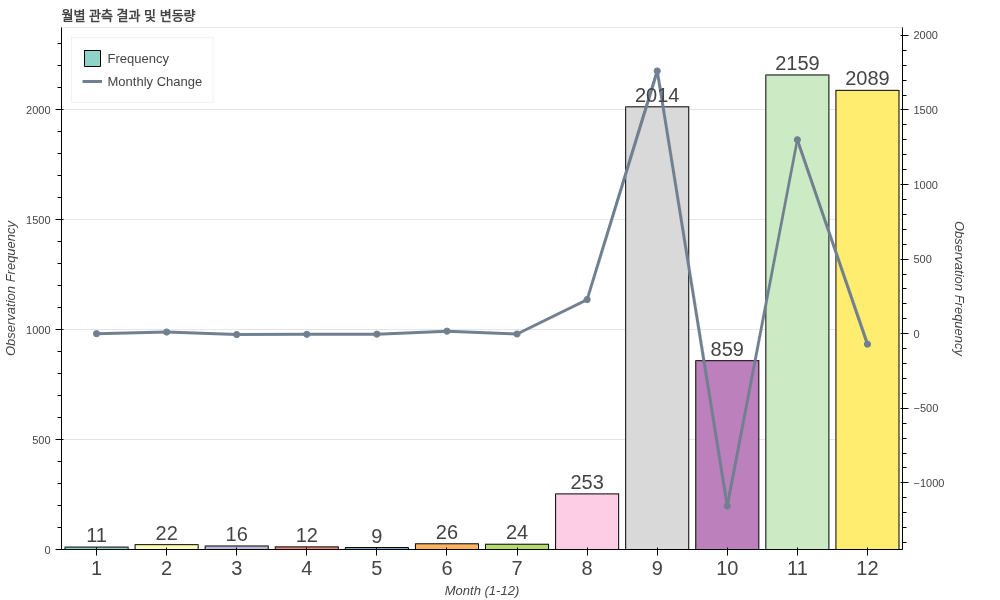

### time series data

#### preprocess

In [79]:
df

,id,date,time,address,state,latitude,longitude,elevation,magnitude,white,red,blue,green,purple,orange,yellow,-magnitude,datetime
0,1,1995-06-08,0 days 02:00:00,"Trafalgar, IN",IN,39,-86,267,-13,0,0,0,1,0,0,0,13,1995-06-08 02:00:00
1,2,1995-06-20,0 days 17:00:00,"Munhall, PA",PA,40,-79,329,-13,0,1,0,0,0,1,0,13,1995-06-20 17:00:00
2,3,1995-07-04,0 days 21:30:00,"Myrtle, MS",MS,34,-89,108,-19,0,1,0,0,0,1,1,19,1995-07-04 21:30:00
3,4,1995-08-01,0 days 16:00:00,"Pottstown, PA",PA,40,-75,46,-16,0,1,0,0,0,0,0,16,1995-08-01 16:00:00
4,5,1995-12-15,0 days 06:50:00,"Eagan, MN",MN,44,-93,257,-15,1,0,0,0,0,0,0,15,1995-12-15 06:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7489,7490,2014-12-31,0 days 02:08:00,"Depoe Bay, OR",OR,44,-124,12,-6,1,0,0,0,0,0,0,6,2014-12-31 02:08:00
7490,7491,2014-12-31,0 days 22:20:00,", OH",OH,39,-83,309,-11,0,0,0,0,0,0,1,11,2014-12-31 22:20:00
7491,7492,2014-12-31,0 days 22:40:00,", NY",NY,40,-73,28,-14,0,0,0,0,0,1,0,14,2014-12-31 22:40:00
7492,7493,2014-12-31,0 days 21:30:00,"Willow Hill, IL",IL,39,-87,151,-18,1,0,0,0,0,0,0,18,2014-12-31 21:30:00


In [81]:
condition = (df['state'].str.len() == 2)
filtered_df = df.loc[condition]

In [84]:
filtered_df

,id,date,time,address,state,latitude,longitude,elevation,magnitude,white,red,blue,green,purple,orange,yellow,-magnitude,datetime
0,1,1995-06-08,0 days 02:00:00,"Trafalgar, IN",IN,39,-86,267,-13,0,0,0,1,0,0,0,13,1995-06-08 02:00:00
1,2,1995-06-20,0 days 17:00:00,"Munhall, PA",PA,40,-79,329,-13,0,1,0,0,0,1,0,13,1995-06-20 17:00:00
2,3,1995-07-04,0 days 21:30:00,"Myrtle, MS",MS,34,-89,108,-19,0,1,0,0,0,1,1,19,1995-07-04 21:30:00
3,4,1995-08-01,0 days 16:00:00,"Pottstown, PA",PA,40,-75,46,-16,0,1,0,0,0,0,0,16,1995-08-01 16:00:00
4,5,1995-12-15,0 days 06:50:00,"Eagan, MN",MN,44,-93,257,-15,1,0,0,0,0,0,0,15,1995-12-15 06:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7489,7490,2014-12-31,0 days 02:08:00,"Depoe Bay, OR",OR,44,-124,12,-6,1,0,0,0,0,0,0,6,2014-12-31 02:08:00
7490,7491,2014-12-31,0 days 22:20:00,", OH",OH,39,-83,309,-11,0,0,0,0,0,0,1,11,2014-12-31 22:20:00
7491,7492,2014-12-31,0 days 22:40:00,", NY",NY,40,-73,28,-14,0,0,0,0,0,1,0,14,2014-12-31 22:40:00
7492,7493,2014-12-31,0 days 21:30:00,"Willow Hill, IL",IL,39,-87,151,-18,1,0,0,0,0,0,0,18,2014-12-31 21:30:00


In [86]:
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, HoverTool, DatetimeTickFormatter

In [92]:
df = filtered_df.reset_index()

In [97]:


# 월('M') 단위로 리샘플링하고 각 월의 데이터 개수를 셉니다.
monthly_counts = filtered_df.resample('M').size()

# 시리즈를 데이터프레임으로 변환하고 열 이름을 지정합니다.
monthly_df = monthly_counts.reset_index(name='count')
monthly_df.rename(columns={'date': 'Month'}, inplace=True)

# --- 2. Bokeh 시각화 ---
# Bokeh가 데이터를 효율적으로 처리할 수 있도록 ColumnDataSource로 변환합니다.
source = ColumnDataSource(monthly_df)

# 툴팁 설정: (표시할 이름, @데이터열이름)
# 날짜 형식을 지정하기 위해 @Month{format}을 사용합니다.
hover = HoverTool(
    tooltips=[
        ('월', '@Month{%Y-%m}'),  # 날짜를 'YYYY-MM' 형식으로 표시
        ('발생 횟수', '@count')
    ],
    # 날짜 형식 지정
    formatters={
        '@Month': 'datetime' 
    },
    # 마우스가 라인이 아닌 점(glyph) 위에 있을 때만 툴팁이 활성화되도록 설정
    mode='mouse' 
)

# 플롯(figure) 생성
# x_axis_type='datetime'으로 설정하여 x축이 시간임을 명시합니다.
p = figure(
    title='월별 발생 횟수 (Bokeh)',
    x_axis_label='월',
    y_axis_label='발생 횟수',
    x_axis_type='datetime',
    width=1000,  # 차트 너비
    height=500, # 차트 높이
    tools=[hover, 'pan,wheel_zoom,box_zoom,reset,save'] # 툴바에 툴 추가
)

# 1. 라인(선) 글리프 추가
p.line(
    x='Month',       # x축 데이터 열 이름
    y='count',       # y축 데이터 열 이름
    source=source,   # 데이터 소스
    line_width=2     # 선 굵기
)

# 2. 서클(점) 글리프 추가 (툴팁을 점 위에 표시하기 위함)
# p.circle(
#     x='Month',
#     y='count',
#     source=source,
#     size=8,          # 점 크기
#     fill_color='white',
#     line_width=2
# )

# x축 눈금 레이블 형식 변경 (선택 사항)
p.xaxis.formatter = DatetimeTickFormatter(
    months="%Y-%m",
    years="%Y"
)

# HTML 파일로 저장 (예: 'monthly_bokeh_chart.html')
# output_file('monthly_bokeh_chart.html')

# Jupyter Notebook 등에서 바로 차트를 보여줍니다.
show(p)

/tmp/ipykernel_7719/2296508746.py:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [101]:
monthly_df_filtered = monthly_df.loc[monthly_df['Month'] > '2014-01-01' ]

In [102]:
monthly_df_filtered

,Month,count
223,2014-01-31,7
224,2014-02-28,10
225,2014-03-31,2
226,2014-04-30,1
227,2014-05-31,1
228,2014-06-30,4
229,2014-07-31,5
230,2014-08-31,232
231,2014-09-30,1959
232,2014-10-31,822


In [107]:
filtered_df = filtered_df.reset_index()

In [109]:
import pandas as pd
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, HoverTool
# from bokeh.transform import factor_cmap (이 예제에서는 더 간단한 방식을 사용합니다)



# 2014년 1월 1일 이후 데이터 필터링
df_2014_onwards = filtered_df[filtered_df['date'] >= '2014-01-01'].copy()

# 컬러 데이터 집계
color_columns = ['white', 'red', 'blue', 'green', 'purple', 'orange', 'yellow']
color_totals = df_2014_onwards[color_columns].sum()

# 시각화를 위한 데이터 재구성
color_df = color_totals.reset_index()
color_df.columns = ['Color', 'Count']


# --- 2. Bokeh를 위한 데이터 정렬 (중요) ---

# 'Count'를 기준으로 데이터프레임을 내림차순 정렬합니다.
color_df_sorted = color_df.sort_values('Count', ascending=False)

# 정렬된 색상 이름을 리스트로 추출합니다. (이것이 X축의 순서가 됩니다)
sorted_colors = color_df_sorted['Color'].tolist()

# 정렬된 데이터프레임을 ColumnDataSource로 변환합니다.
source = ColumnDataSource(color_df_sorted)


# --- 3. Bokeh 시각화 ---

# 툴팁 설정
hover = HoverTool(
    tooltips=[
        ('색상', '@Color'),
        ('횟수', '@Count')
    ]
)

# 플롯(figure) 생성
p = figure(
    title='Color Sightings (From 2014-01-01 onwards)',
    # x_range에 정렬된 색상 리스트를 전달하여 순서를 고정합니다.
    x_range=sorted_colors, 
    y_axis_label='Total Sightings (since 2014)',
    x_axis_label='Color',
    width=1200,
    height=700,
    tools=[hover, 'pan,wheel_zoom,box_zoom,reset,save'] # 툴바에 툴 추가
)

# VBar (수직 막대) 글리프 추가
p.vbar(
    x='Color',        # x축 카테고리 열
    top='Count',      # y축 (막대의 상단) 값 열
    source=source,    # 데이터 소스
    width=0.9,        # 막대 너비
    
    # 'Color' 열에 'red', 'blue' 등 실제 색상 이름이 있으므로
    # 이 열을 fill_color로 직접 지정할 수 있습니다.
    fill_color='Color',
    
    line_color='black'  # 막대 테두리 색상
)

# (선택 사항) X축의 세로 그리드 라인을 제거하여 더 깔끔하게 만듭니다.
p.xgrid.grid_line_color = None

# (선택 사항) Y축은 0부터 시작하도록 설정
p.y_range.start = 0

# HTML 파일로 저장하거나
# output_file("color_sightings_bokeh.html")

# 차트를 바로 보여줍니다.
show(p)

In [111]:
from bokeh.palettes import Category10_8

In [115]:
df_2014 = filtered_df[filtered_df['date'] >= '2014-01-01'].copy()

# 1.3. 시계열 데이터 집계 (Resampling)
df_2014.set_index('date', inplace=True)
color_columns = ['white', 'red', 'blue', 'green', 'purple', 'orange', 'yellow']
total_counts = df_2014.resample('M').size().to_frame(name='Total')
color_counts = df_2014[color_columns].resample('M').sum()
merged_df = pd.concat([total_counts, color_counts], axis=1)

# 1.4. 'Long-form' 데이터 변환 (Bokeh에서 그룹별로 그리기 위해 중요)
long_df = merged_df.reset_index().melt(
    id_vars='date', 
    var_name='Frequency_Type',  # 'Total', 'white', 'red' 등
    value_name='Count'          # 횟수
)
print("Long-form 데이터 변환 완료.")

# --- 2. Bokeh 시각화 ---
print("Step 2: Bokeh 차트 생성 중...")

# 2.1. 툴팁 설정
# HoverTool은 전체 Figure에 한 번만 추가하면 됩니다.
hover = HoverTool(
    tooltips=[
        ('월', '@date{%Y-%m}'),
        ('유형', '@Frequency_Type'),
        ('횟수', '@Count')
    ],
    formatters={'@date': 'datetime'}, # 날짜 형식 지정
    mode='mouse' # 마우스가 점(glyph) 위에 있을 때
)

# 2.2. 플롯(figure) 생성
p = figure(
    title='Monthly Occurrences (Total vs. Colors) Since 2014',
    x_axis_label='Month',
    y_axis_label='Monthly Occurrences',
    x_axis_type='datetime',
    width=1200,
    height=600,
    tools=[hover, 'pan,wheel_zoom,box_zoom,reset,save'] # 툴바에 HoverTool 추가
)

# 2.3. 그릴 라인 목록과 색상 팔레트 매칭
# Category10_8은 8개의 색상을 가진 리스트입니다.
frequency_types = ['Total', 'white', 'red', 'blue', 'green', 'purple', 'orange', 'yellow']
colors = Category10_8

# 2.4. 각 라인을 반복문으로 그리기
# 'Total' 라인부터 'yellow' 라인까지 하나씩 차트에 추가합니다.
for freq_type, color in zip(frequency_types, colors):
    
    # 해당 유형(예: 'Total')의 데이터만 필터링합니다.
    subset_df = long_df[long_df['Frequency_Type'] == freq_type]
    
    # 이 라인만을 위한 ColumnDataSource를 만듭니다.
    subset_source = ColumnDataSource(subset_df)
    
    # (1) 라인(선) 글리프 추가
    p.line(
        x='date', 
        y='Count', 
        source=subset_source, 
        color=color, 
        legend_label=freq_type, # 범례 레이블
        line_width=2
    )
    
    # (2) 서클(점) 글리프 추가 (HoverTool이 잘 작동하도록)
    # 여기에는 legend_label을 추가하지 않아 범례가 중복되지 않게 합니다.
    p.circle(
        x='date', 
        y='Count', 
        source=subset_source, 
        color=color, 
        fill_color='white',
        size=5
    )

# 2.5. X축 눈금 형식 지정 (이전 오류 수정 버전)
p.xaxis.formatter = DatetimeTickFormatter(
    months="%Y-%m", # 리스트가 아닌 문자열로
    years="%Y"
)

# 2.6. 범례(Legend) 설정
p.legend.location = "top_left"
p.legend.click_policy = "hide" # 범례를 클릭하면 해당 라인 숨기기
p.legend.label_text_font_size = "9pt" # 범례 폰트 크기

# HTML 파일로 저장
output_file("monthly_multi_line_bokeh.html")
print("Step 3: 'monthly_multi_line_bokeh.html' 파일로 저장 완료.")
# 로컬 환경에서 실행 중이라면 show(p)를 호출하세요.
show(p)

/tmp/ipykernel_7719/852172966.py:6: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

/tmp/ipykernel_7719/852172966.py:7: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

/tmp/ipykernel_7719/852172966.py:71: BokehDeprecationWarning:

'circle() method with size value' was deprecated in Bokeh 3.4.0 and will be removed, use 'scatter(size=...) instead' instead.

/tmp/ipykernel_7719/852172966.py:71: BokehDeprecationWarning:

'circle() method with size value' was deprecated in Bokeh 3.4.0 and will be removed, use 'scatter(size=...) instead' instead.

/tmp/ipykernel_7719/852172966.py:71: BokehDeprecationWarning:

'circle() method with size value' was deprecated in Bokeh 3.4.0 and will be removed, use 'scatter(size=...) instead' instead.

/tmp/ipykernel_7719/852172966.py:71: BokehDeprecationWarning:

'circle() method with size value' was deprecated in Bokeh 3.4.0 and will be removed, use 'sca

Long-form 데이터 변환 완료.
Step 2: Bokeh 차트 생성 중...
Step 3: 'monthly_multi_line_bokeh.html' 파일로 저장 완료.
